# Практическое задание №7 "Классификация с помощью KNN. Кластеризация K-means".

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.
2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [1]:
import random 
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Задание №1

__Методы__

In [2]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance), 1/np.sqrt(distance) if distance != 0 else 1

In [3]:
def e_metrics_w(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [4]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [5]:
def knn_w(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = [] 
        
        for i in range(len(x_train)):
            distance = e_metrics_w(x, x_train[i])
            weight = 1/(distance**2)
            distance_w = weight    
            test_distances.append((distance_w, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[-k:]:
            classes[d[1]] += d[0]

        answers.append(sorted(classes, key=classes.get)[0])
    return answers

In [6]:
def knn_i(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = [] 
        
        for i in range(len(x_train)):
            distance = e_metrics_w(x, x_train[i])
            weight = i**distance
            distance_w = weight    
            test_distances.append((distance_w, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[-k:]:
            classes[d[1]] += d[0]

        answers.append(sorted(classes, key=classes.get)[0])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .2
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [9]:
def get_graph_w(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .2
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_w(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [10]:
def get_graph_i(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .2
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_i(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

__Датасет, обучение, визуализация__

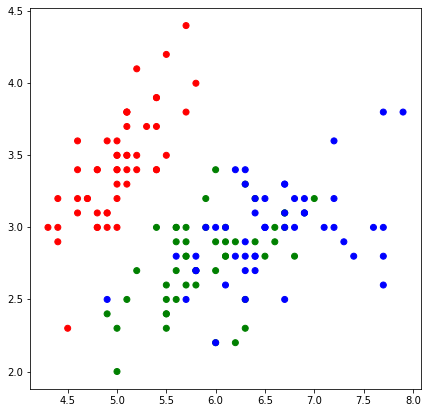

In [11]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

Три версии алгоритма: обычный и с добавлением весов по двум разным формулам:

1. Обычный

2. С добавлением весов соседей $w(d) = \frac{1}{d}$

3. С добавлением весов соседей $w(d) = q^{d}$


* Алгоритм без весов соседей

In [12]:
k = 7
y_pred = knn(X_train, y_train, X_train, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_train):.3f}')

Точность алгоритма при k = 7: 0.825


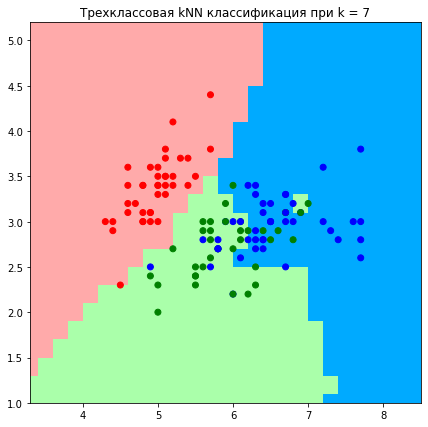

In [13]:
get_graph(X_train, y_train, k)

* Алгоритм с весами соседей $w(d) = \frac{1}{d}$

In [14]:
k = 7
y_pred = knn_w(X_train, y_train, X_train, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_train):.3f}')

Точность алгоритма при k = 7: 0.000


C:\Temp/ipykernel_12484/2751662959.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/(distance**2)


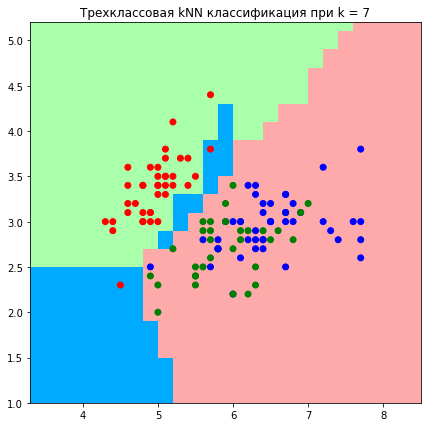

In [15]:
get_graph_w(X_train, y_train, k)

Как видно из графика (а также по появившемуся warning), вероятно имеет место быть d = 0, следовательно вес становится бесконечно большим, что приводит к переобучению, что видно по нулевой точности.

* Алгоритм с весами соседей $w(d) = q^{d}$

In [16]:
k = 7
y_pred = knn_i(X_train, y_train, X_train, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_train):.3f}')

Точность алгоритма при k = 7: 0.650


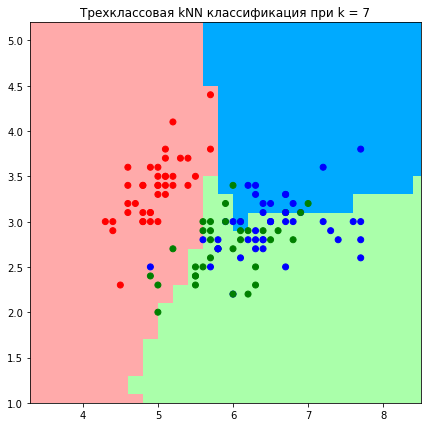

In [17]:
get_graph_i(X_train, y_train, k)

При добавлении весов наблюдаются значительные отличия в построении областей отнесения точек к разным классам от обычного алгоритма. Также при добавлении веса точность становится хуже.

## Задание №2

__Методы__

In [18]:
def kmeans(data, k, max_iterations, min_distance):    
    centroids = [data[i] for i in range(k)]
    for _ in range(max_iterations):
        classes = {i: [] for i in range(k)}
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        old_centroids = centroids.copy()
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0) 
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False      
        if optimal:
            break
    return old_centroids, classes

In [19]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [20]:
def inclus_dis(centroids, classes):
    summ = 0.0
    for k, elems in classes.items():
        nk = 0
        dk = 0.0
        for elem in elems:
            nk +=1
            dk += (e_metrics(elem, centroids[k]))**2
        summ +=dk/nk
    return summ

__Датасет, обучение, график зависимости__

Датасет

In [21]:
X, y = make_blobs(n_samples = 150, random_state = 42)

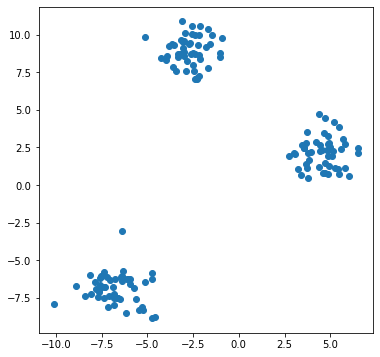

In [22]:
plt.figure(figsize = (6,6))
plt.scatter(X[:,0],X[:,1])
plt.show()

Обучение

In [23]:
max_iterations = 3
min_distance = 1e-4
ka = np.arange(1,11)
icd=[]
for k in ka:
    centroids, clusters = kmeans(X,k,max_iterations,min_distance)
    intercl_dist = inclus_dis(centroids,clusters)
    icd.append(round(intercl_dist,2))

print(f"icd: {icd}")

icd: [65.75, 58.34, 5.67, 6.02, 7.07, 7.54, 7.8, 7.85, 7.49, 7.54]


График

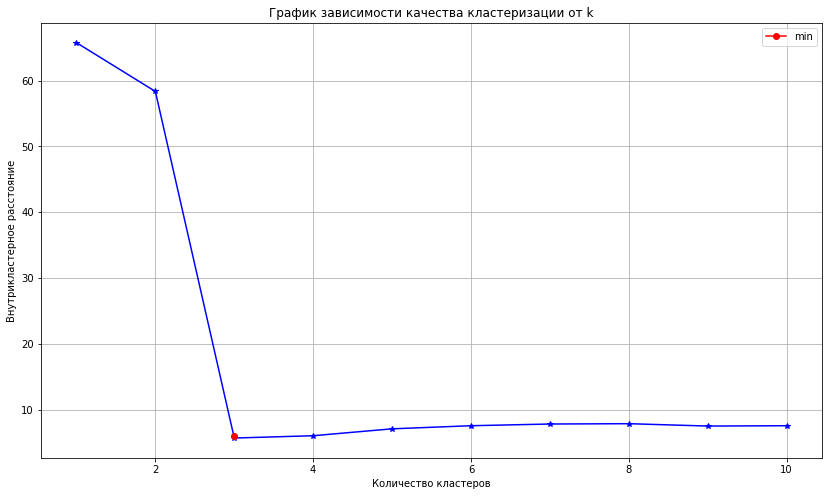

In [24]:
plt.figure(figsize = (14,8))
plt.plot(np.array(ka), np.array(icd), color='b', marker='*')
plt.plot(3, icd[3], color='r', marker='o', label='min')
plt.legend()
# plt.plot(np.arange(1,11), [icd[3]]*np.ones(10), alpha=0.5, c='g')
plt.title('График зависимости качества кластеризации от k')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.grid()
plt.show()

Точка перегиба выпадает на 3 кластера.

---